In [ ]:
CO₂ emissions estimation from engine size, fuel type, and mileage.

NAME : HARSHITH K N


CLASS : 3RD SEM CSE


USN :1CD24CS097


EMAIL: harshithkn2005@gmail.com


CLG EMAIL : harshith.24cse@cambridge.edu.in

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("co2_emissions.csv")


In [ ]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)


/tmp/ipython-input-603422227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)



/tmp/ipython-input-4263846145.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop(columns=['co2_emissions_gkm'])
y = df['co2_emissions_gkm']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [ ]:
model = RandomForestRegressor(
    n_estimators=200,       # number of trees
    max_depth=15,           # limit depth to avoid overfitting
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   engine_size_l             1000 non-null   float64
 1   annual_mileage_km         1000 non-null   float64
 2   vehicle_age_years         1000 non-null   float64
 3   co2_emissions_gkm         1000 non-null   float64
 4   fuel_type_Diesel          1000 non-null   bool   
 5   fuel_type_Hybrid          1000 non-null   bool   
 6   fuel_type_LPG             1000 non-null   bool   
 7   fuel_type_Petrol          1000 non-null   bool   
 8   driving_style_Eco         1000 non-null   bool   
 9   driving_style_Normal      1000 non-null   bool   
 10  road_type_Mixed           1000 non-null   bool   
 11  road_type_Urban           1000 non-null   bool   
 12  emission_standard_Euro 4  1000 non-null   bool   
 13  emission_standard_Euro 5  1000 non-null   bool   
 14  emission_

In [ ]:
df.describe(include="all")

,engine_size_l,annual_mileage_km,vehicle_age_years,co2_emissions_gkm,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_LPG,fuel_type_Petrol,driving_style_Eco,driving_style_Normal,...,emission_standard_Euro 5,emission_standard_Euro 6,maintenance_status_Fair,maintenance_status_Good,maintenance_status_Poor,traffic_exposure_Low,traffic_exposure_Medium,vehicle_category_SUV,vehicle_category_Sedan,vehicle_category_Truck
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,NaN,NaN,NaN,NaN,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,745,807,808,824,798,604,...,770,707,754,774,766,686,604,710,786,752
mean,3.025342,22804.702234,7.049266,186.881606,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.111513,9997.249261,4.285213,61.563452,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000741,5046.012170,0.000000,80.093088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.157338,14217.073182,3.000000,133.826250,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.025342,22804.702234,7.000000,186.881606,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.924215,31477.746771,11.000000,237.878089,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
print("\n✅ Random Forest Model Evaluation:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")



✅ Random Forest Model Evaluation:
MAE: 51.430
MSE: 3601.290
R² Score: 0.031


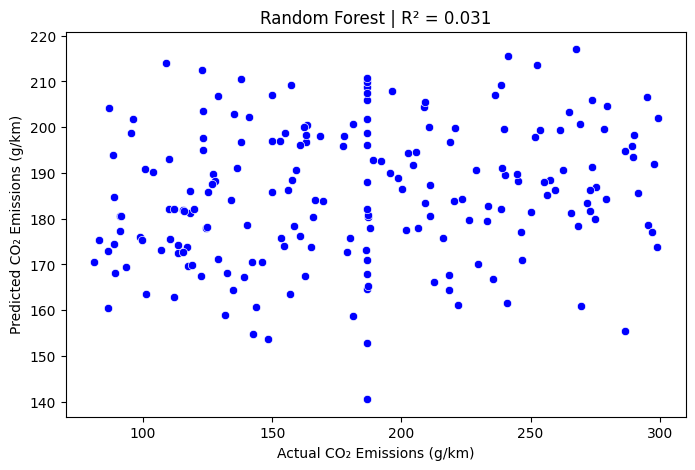

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual CO₂ Emissions (g/km)")
plt.ylabel("Predicted CO₂ Emissions (g/km)")
plt.title(f"Random Forest | R² = {r2:.3f}")
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv("co2_emissions.csv")
df.head(10)   # shows first 10 rows directly in notebook

,engine_size_l,fuel_type,annual_mileage_km,vehicle_age_years,driving_style,road_type,emission_standard,maintenance_status,traffic_exposure,vehicle_category,co2_emissions_gkm
0,3.310943,Petrol,9030.736917,14.0,Normal,Highway,Euro 3,Fair,Low,Hatchback,85.437163
1,3.060338,CNG,19623.405402,1.0,Aggressive,Mixed,Euro 5,Poor,Low,Sedan,278.685802
2,3.742829,Hybrid,14206.802990,NaN,Aggressive,Highway,Euro 4,Fair,Low,Hatchback,95.576773
3,3.598130,Petrol,7485.037783,5.0,Eco,Mixed,Euro 4,Good,Low,Truck,162.827843
4,2.696983,LPG,23977.153605,1.0,Eco,Mixed,Euro 6,Fair,High,Truck,97.839718
5,2.699981,CNG,36121.499494,1.0,Normal,Urban,Euro 3,Good,High,Truck,249.172925
6,1.563113,LPG,28645.995386,NaN,Normal,Urban,Euro 4,Poor,Low,Hatchback,111.089294
7,3.052954,CNG,13738.813579,3.0,Normal,Mixed,Euro 5,Fair,Medium,SUV,274.646520
8,3.348717,LPG,25075.461243,2.0,Eco,Highway,Euro 4,Poor,Medium,SUV,196.648837
9,2.905958,LPG,38013.199917,7.0,Aggressive,Urban,Euro 6,Excellent,Medium,NaN,288.664020


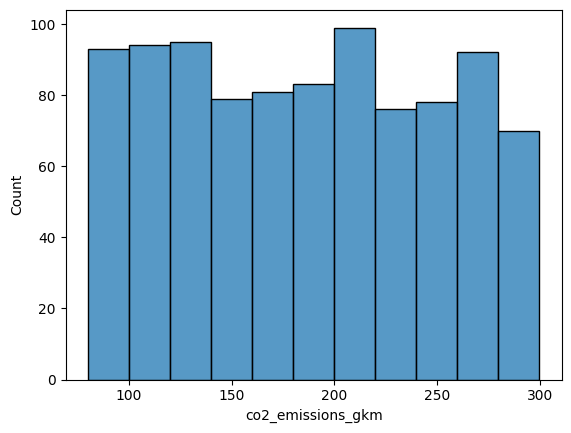

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['co2_emissions_gkm'])
plt.show()

Heatmap of correlation matrix


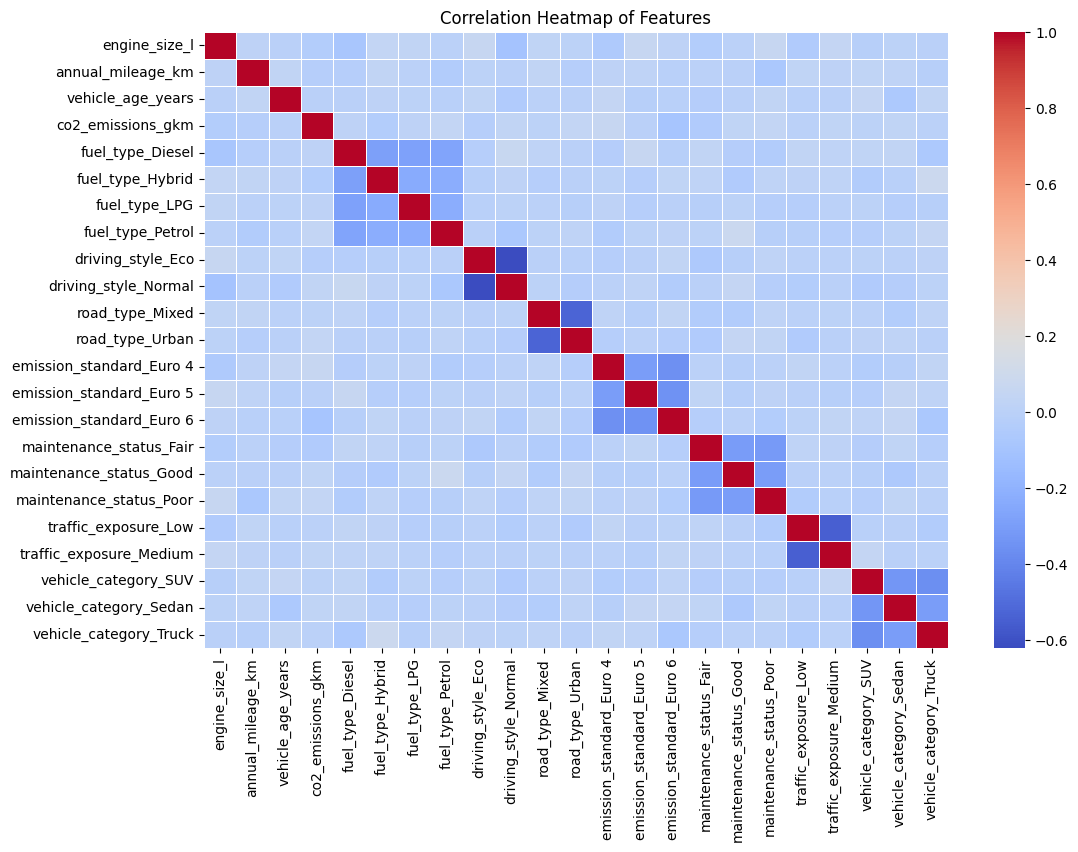

In [ ]:
df = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


 Boxplots for selected features vs CO₂ emissions


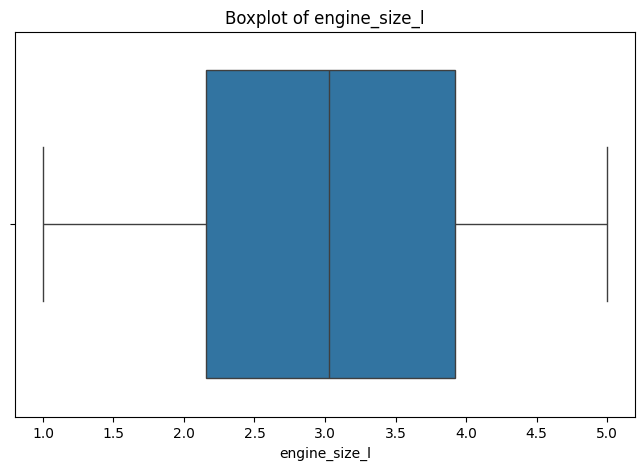

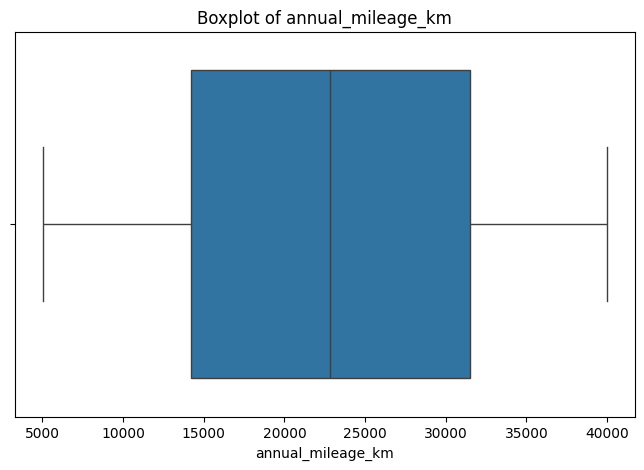

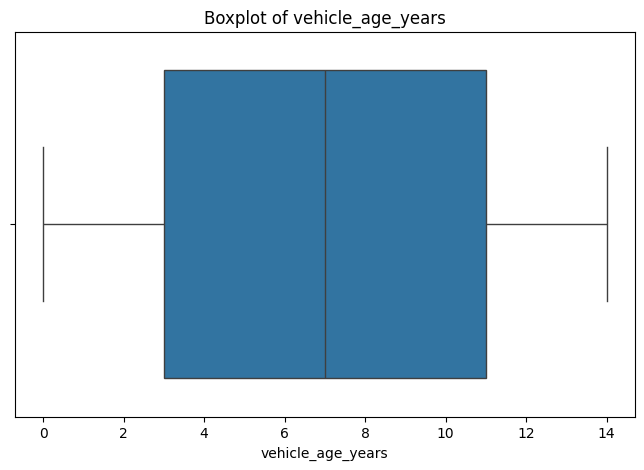

In [ ]:
features_to_plot = ['engine_size_l', 'annual_mileage_km', 'vehicle_age_years']
for feature in features_to_plot:
    if feature in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[feature])
        plt.title(f"Boxplot of {feature}")
        plt.show()

Scatter plot: engine size vs CO₂ emissions


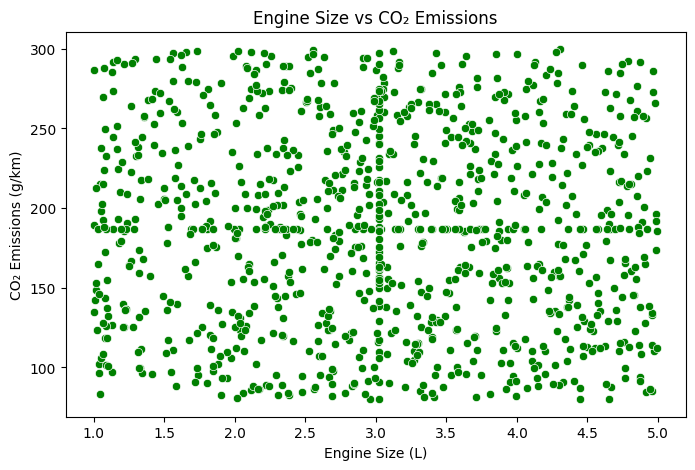

In [ ]:
if 'engine_size_l' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df['engine_size_l'], y=df['co2_emissions_gkm'], color='green')
    plt.xlabel("Engine Size (L)")
    plt.ylabel("CO₂ Emissions (g/km)")
    plt.title("Engine Size vs CO₂ Emissions")
    plt.show()


Distribution plot of CO₂ emissions


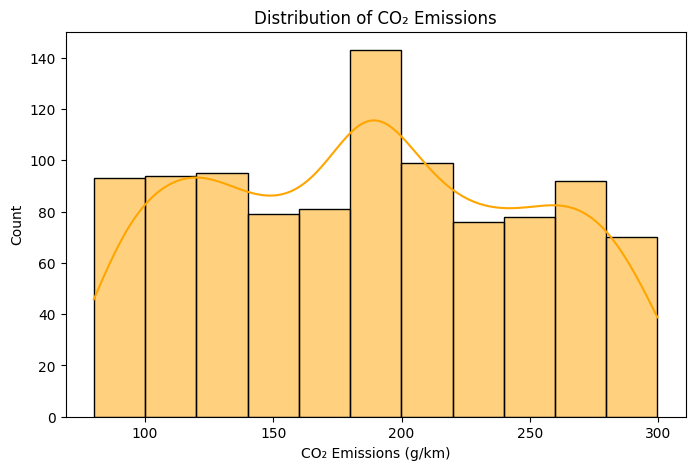

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['co2_emissions_gkm'], kde=True, color='orange')
plt.xlabel("CO₂ Emissions (g/km)")
plt.title("Distribution of CO₂ Emissions")
plt.show()



 Pairplot

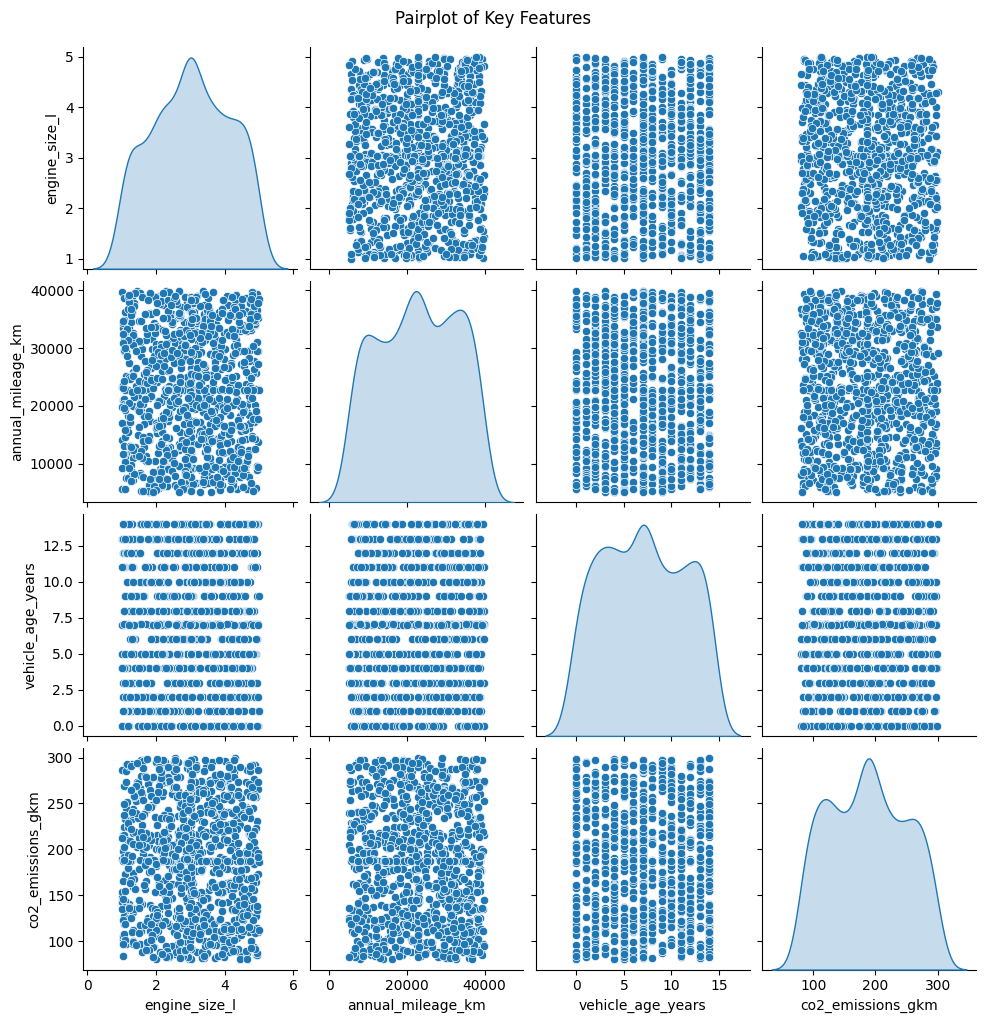

In [ ]:
selected_features = ['engine_size_l', 'annual_mileage_km', 'vehicle_age_years', 'co2_emissions_gkm']
selected_features = [f for f in selected_features if f in df.columns]  # keep only existing
sns.pairplot(df[selected_features], diag_kind="kde")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()
